In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
data= pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
#check for duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Prospect ID and Lead Number

EXPLORATORY DATA ANALYSIS

In [10]:
data.drop(['Prospect ID','Lead Number'], 1 , inplace = True)

In [11]:
data = data.replace('Select', np.nan)

In [12]:
#checking for null values
round ((data.isnull().sum()/len(data.index)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#dropping the cols whose percentage value is more than 45%
cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [14]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Analysis the categorical values

In [15]:
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [16]:
#we will be replacing NAN value to India as india has high value counts
data['Country']=data['Country'].replace(np.NaN, 'India')

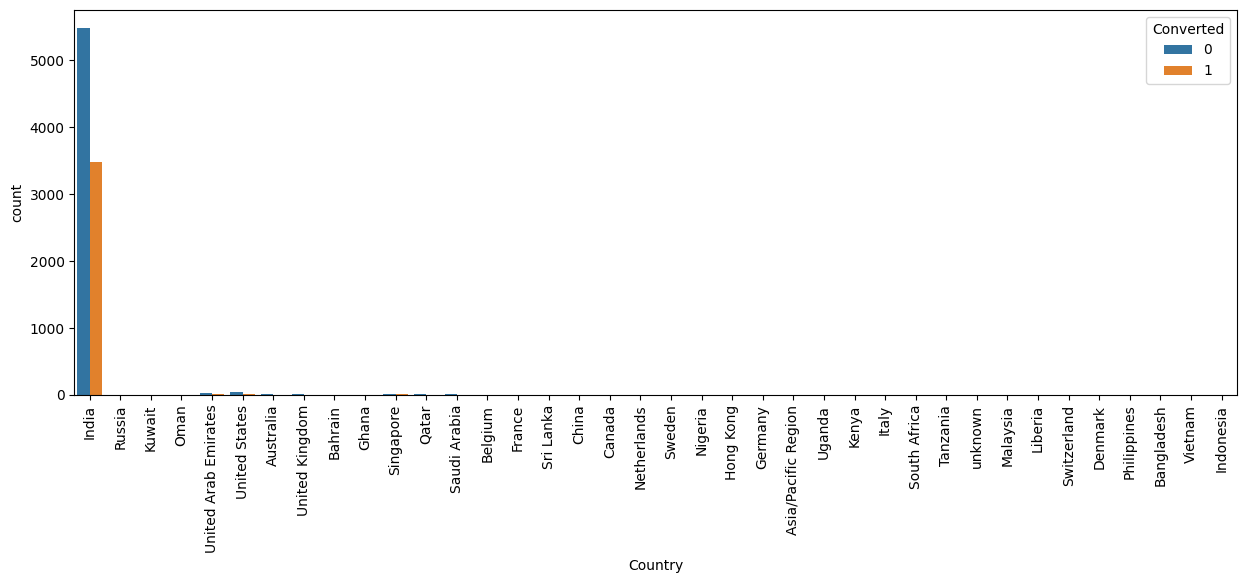

In [17]:
plt.figure(figsize=(15,5))
s=sns.countplot(data=data, x='Country',hue='Converted')
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

In [18]:
# we can drop these columns as india has the higes value 
cols_to_drop = ['Country']

In [19]:
data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
#replacing nan values to mumbai
data['City'] = data['City'].replace(np.NaN,'Mumbai')

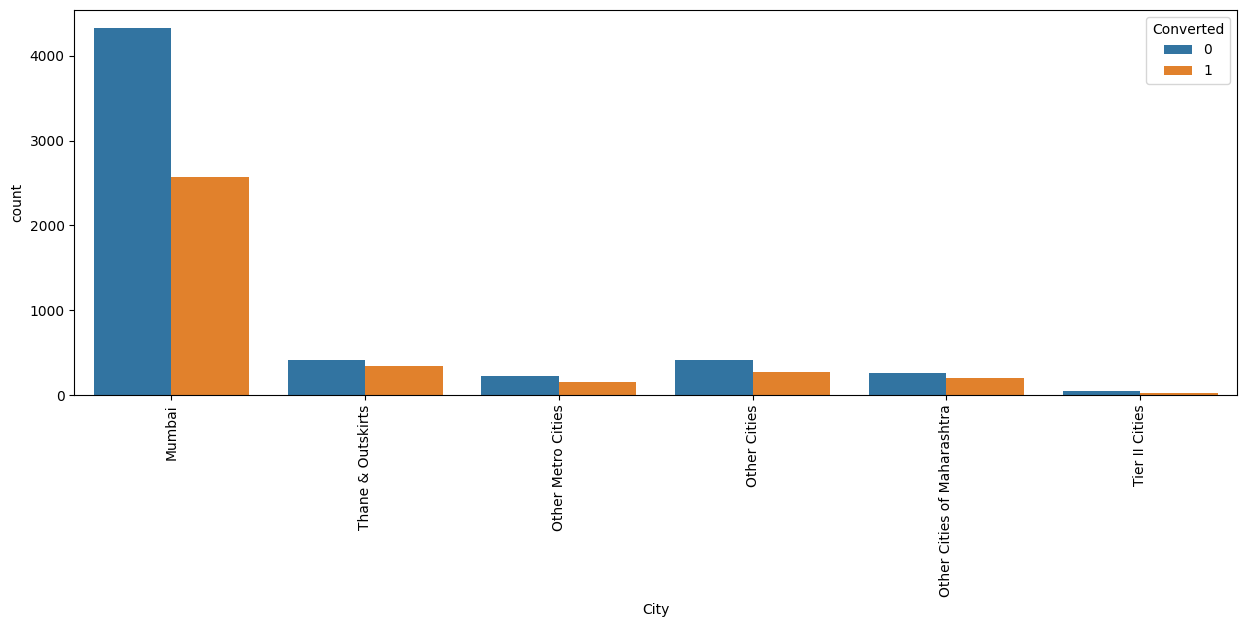

In [21]:
plt.figure(figsize=(15,5))
s=sns.countplot(data=data, x='City',hue='Converted')
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

In [22]:
#checking value counts of Specialization column

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

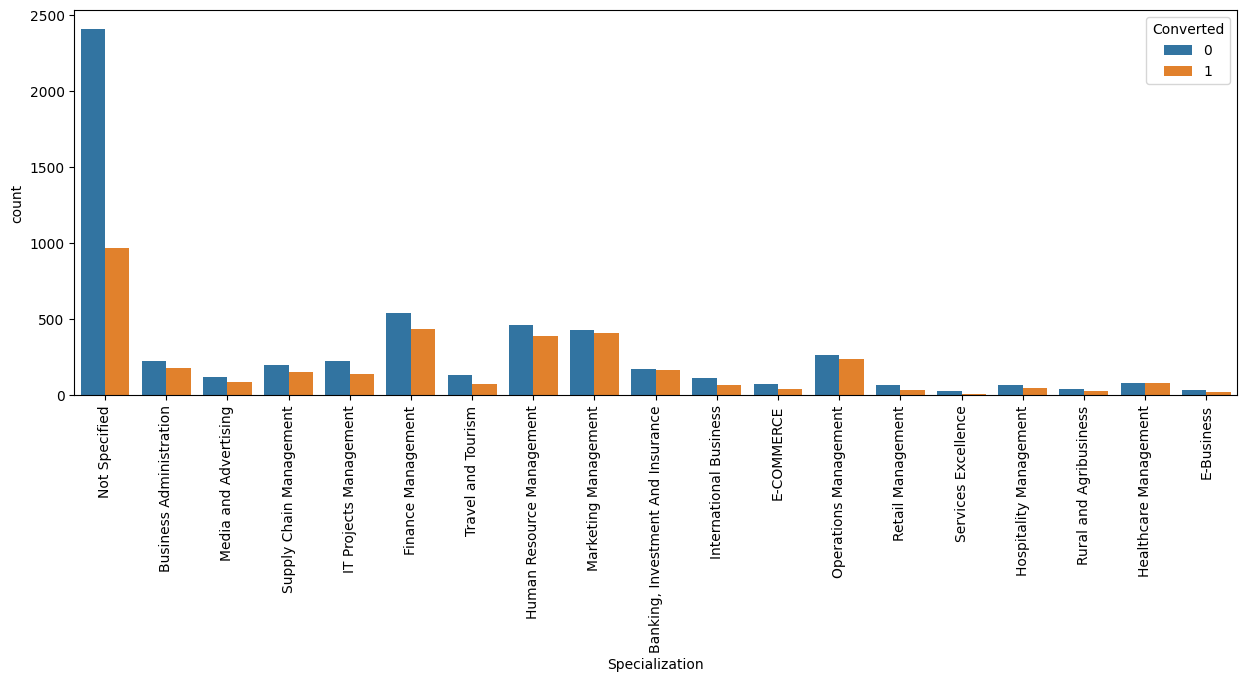

In [24]:
plt.figure(figsize=(15,5))
s=sns.countplot(data=data, x='Specialization',hue='Converted')
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

In [25]:
#combining Management Specializations because they show similar trends

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

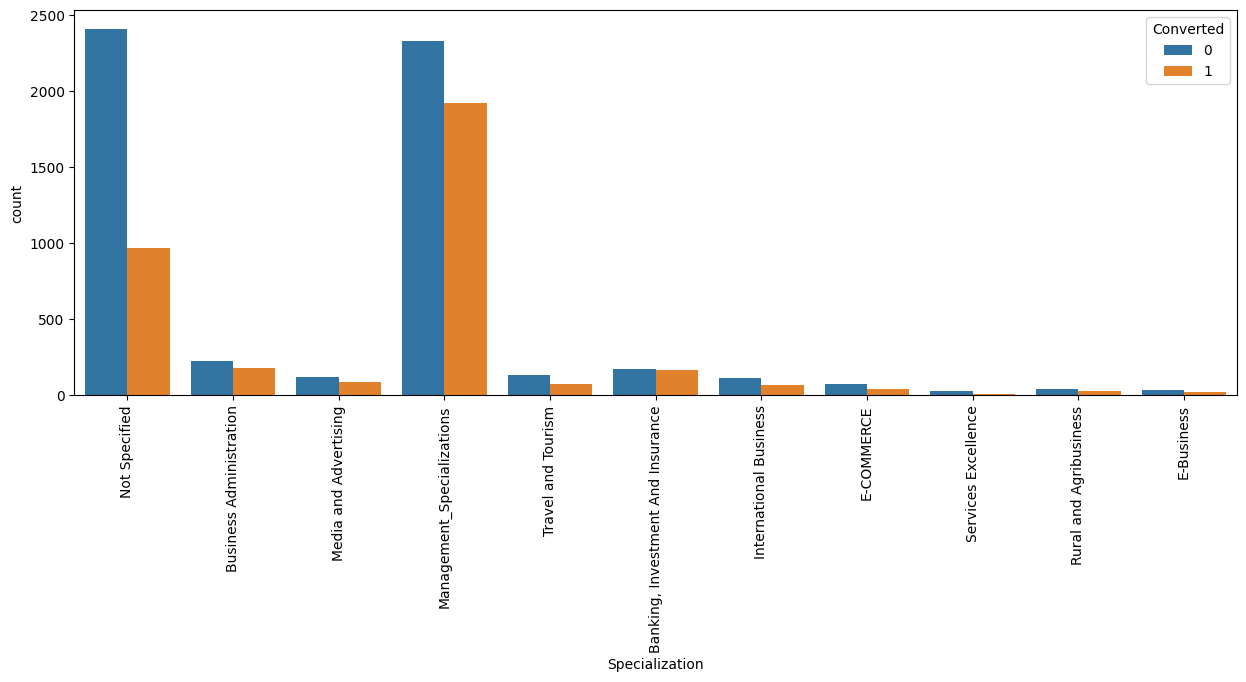

In [26]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(data= data, x='Specialization', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#What is your current occupation

data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Nan values with mode "Unemployed"
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
#checking count of values
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

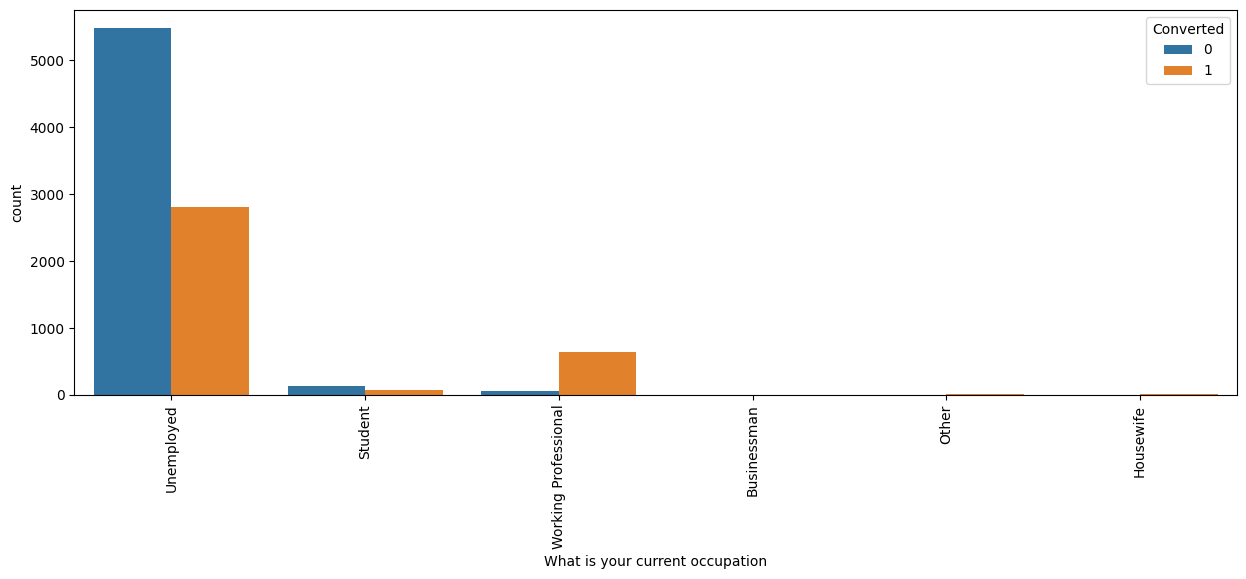

In [30]:

plt.figure(figsize=(15,5))
s1=sns.countplot(data= data, x='What is your current occupation', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
#replacing Nan values with Mode "Better Career Prospects"

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

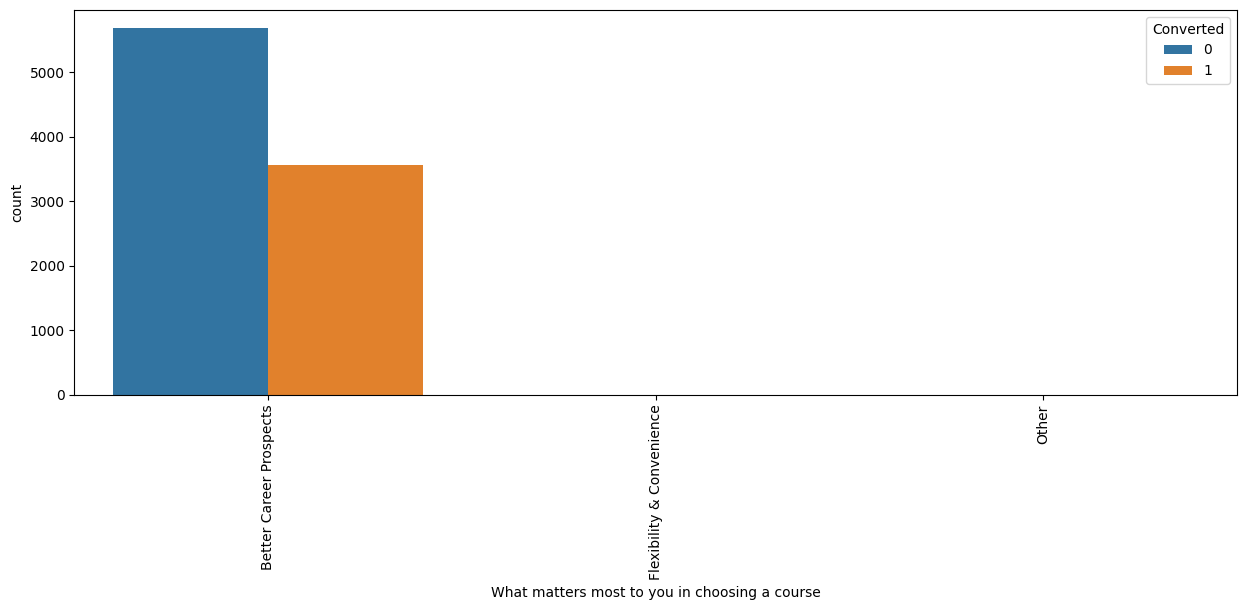

In [33]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data= data, x='What matters most to you in choosing a course', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
#checking value counts of variable
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [36]:
#checking value counts of Tag variable
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

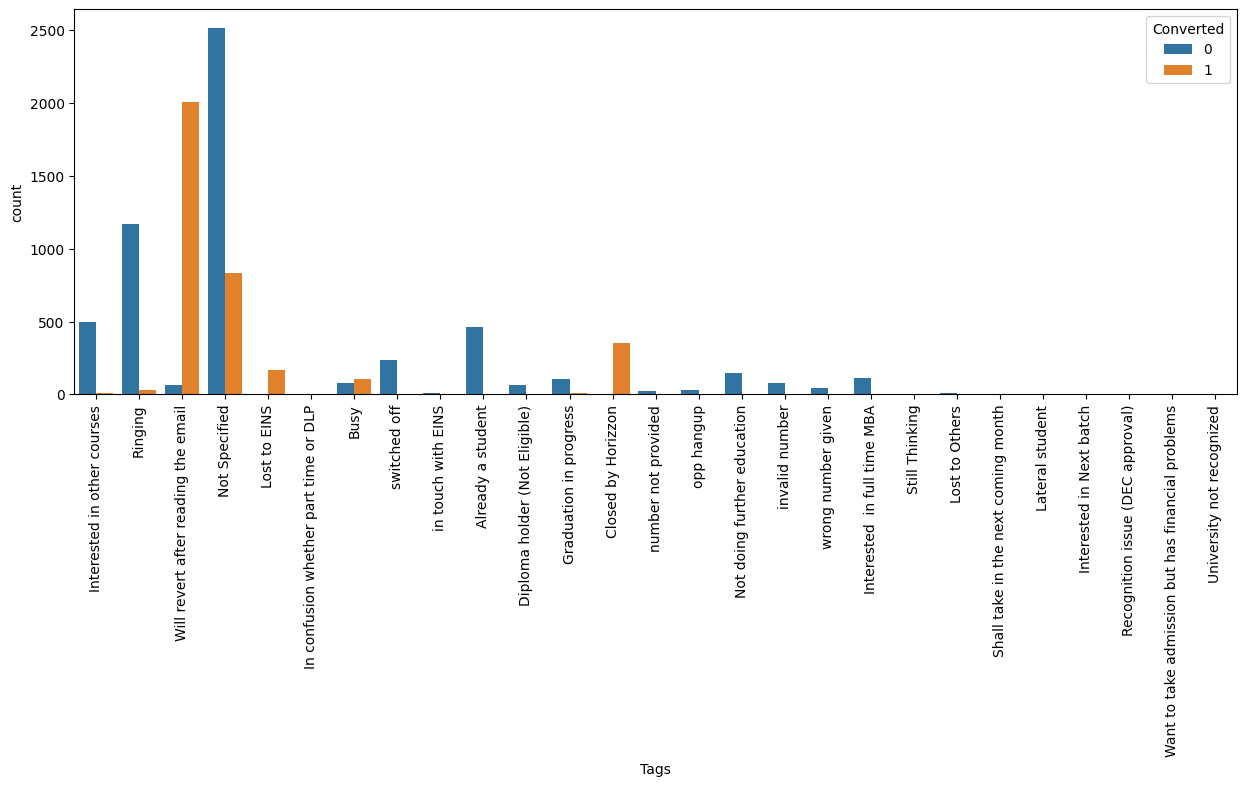

In [38]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data=data, x='Tags', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#replacing low frequency with other tags
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [40]:
#checking percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [41]:
data['Lead Source'].value_counts(dropna =False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                    

We can group some of the lower frequency occuring labels under a common label 'Others'

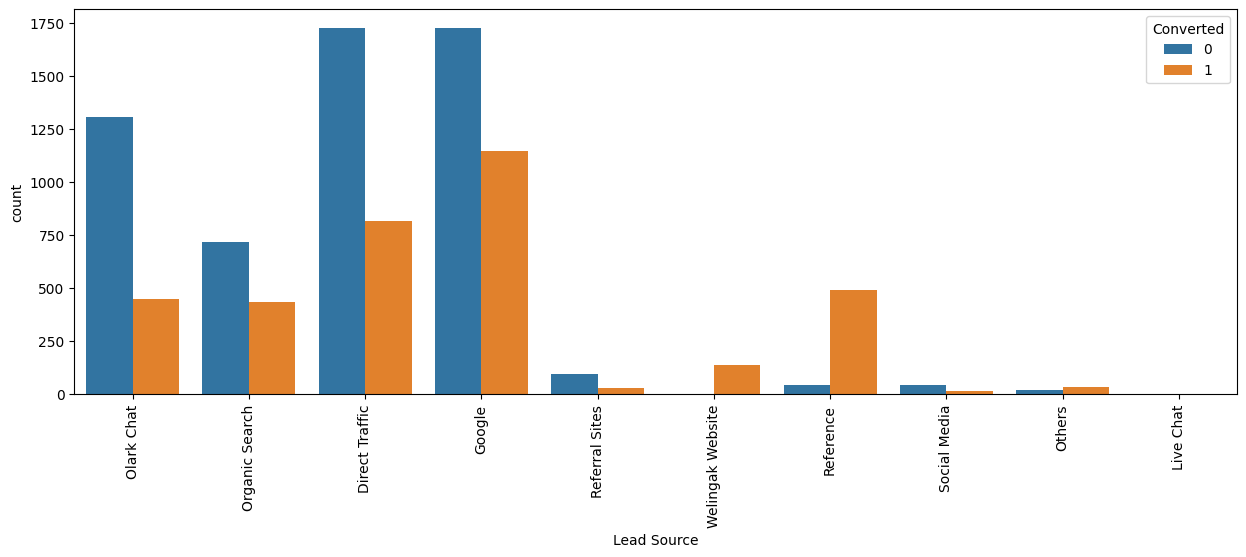

In [43]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data=data, x='Lead Source', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Maximum number of leads are generated by Google and Direct traffic
2. Conversion Rate of reference leads and leads through welingak website is high

In [44]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [46]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [47]:
#Check the Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [48]:
##Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
data = data.dropna()

In [49]:
#Checking percentage of Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [50]:
#Lead Origin
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

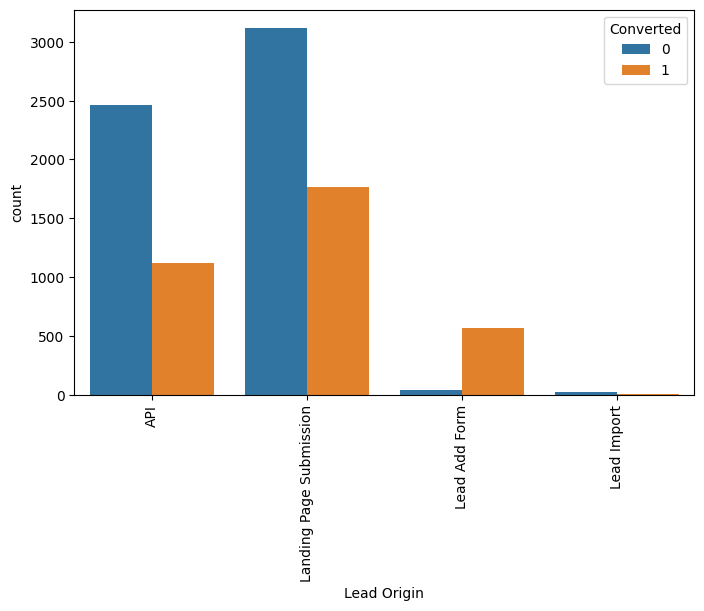

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(data=data, x='Lead Origin', hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#Landing page submission and Api has high number of lead and conversion

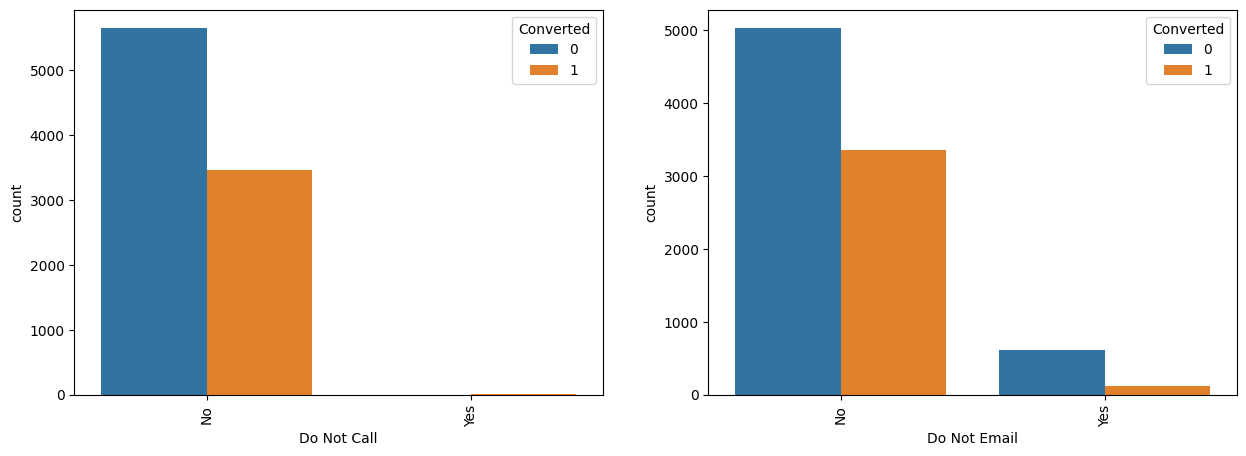

In [53]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data= data, x='Do Not Call', hue=data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data= data, x='Do Not Email', hue=data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [54]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [55]:
#checking value counts for Do Not Call
data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [56]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [57]:
data.Search.value_counts(dropna=False)


No     9089
Yes      14
Name: Search, dtype: int64

In [58]:
data.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [59]:
data['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [60]:
data['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [61]:
data['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [62]:
data['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
data['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
data['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [67]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [68]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [69]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [70]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [71]:

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

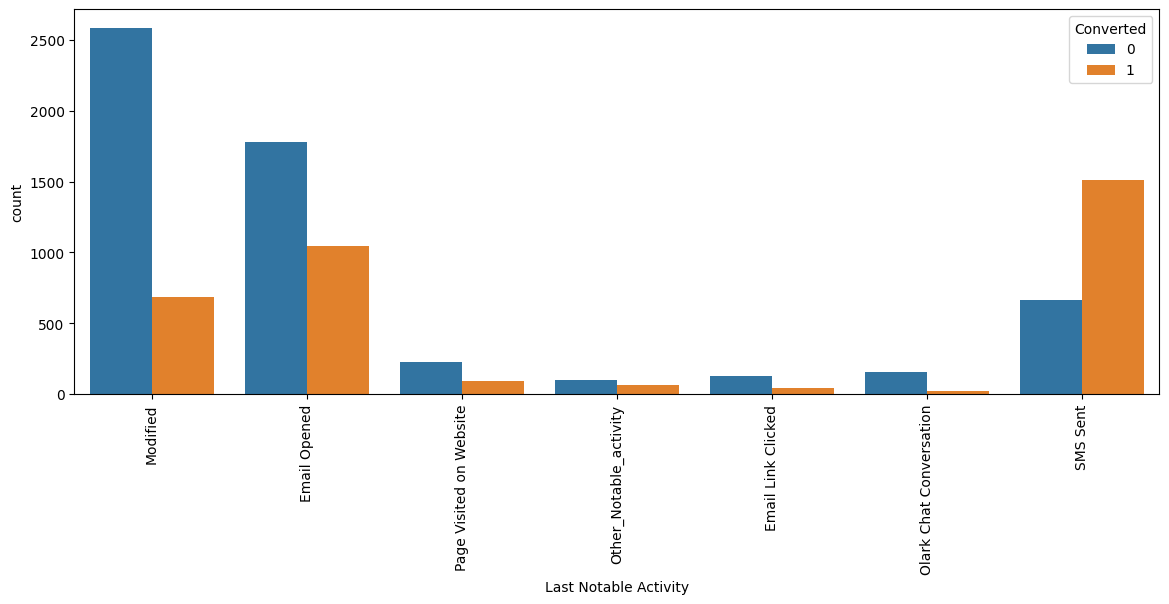

In [72]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [73]:
#checking value counts for variable

data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [74]:
#dropping columns
data = data.drop(cols_to_drop,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [75]:
data.shape

(9103, 14)

In [76]:
#Check the % of Data that has Converted Values

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.02043282434362

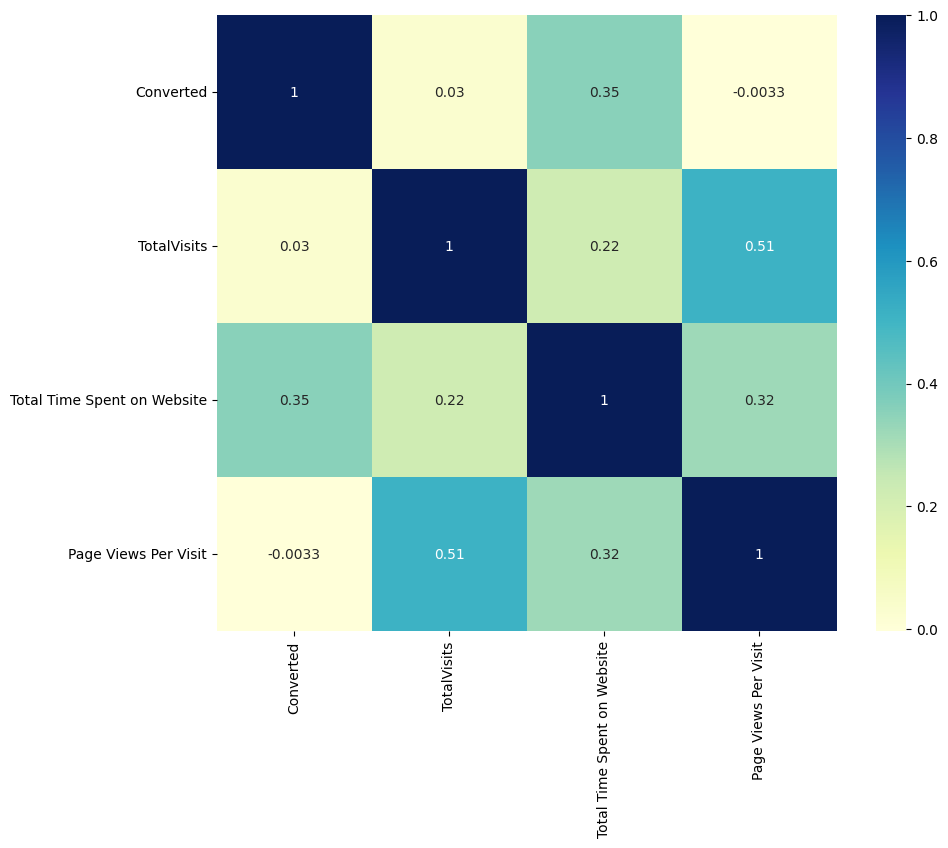

In [77]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

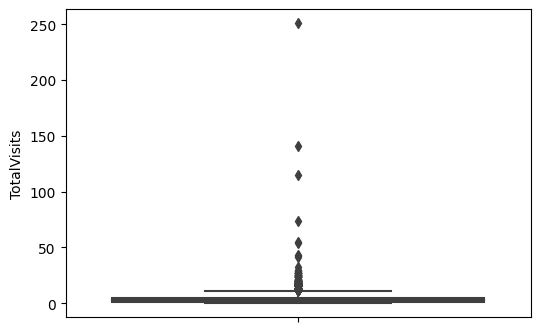

In [78]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [79]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

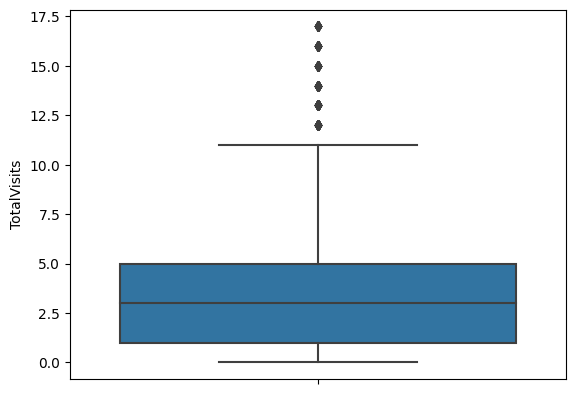

In [80]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = data.TotalVisits.quantile(0.99)
data = data[(data.TotalVisits <= Q3)]
Q1 = data.TotalVisits.quantile(0.01)
data = data[(data.TotalVisits >= Q1)]
sns.boxplot(y=data['TotalVisits'])
plt.show()


In [81]:
data.shape

(9020, 14)

In [82]:
#checking percentiles for "Total Time Spent on Website"

data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

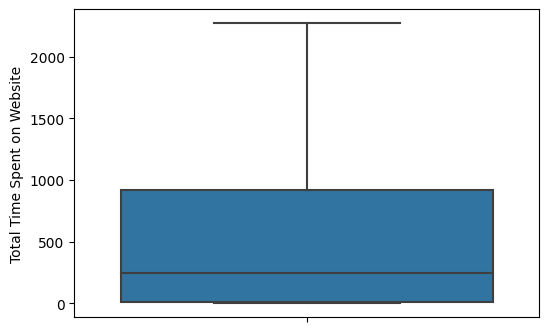

In [83]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

 there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [84]:
#checking spread of "Page Views Per Visit"

data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

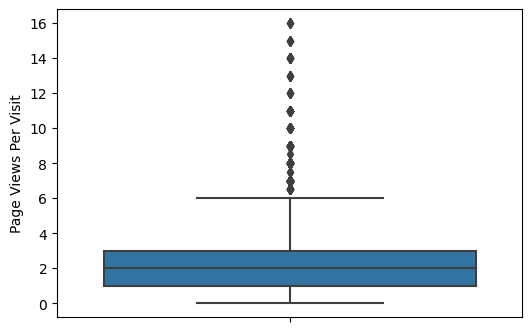

In [85]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

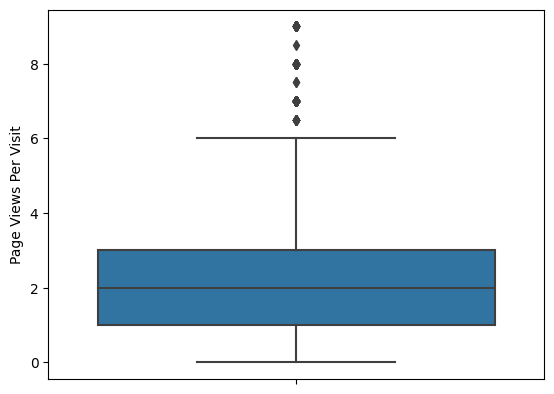

In [86]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [87]:
data.shape

(8953, 14)

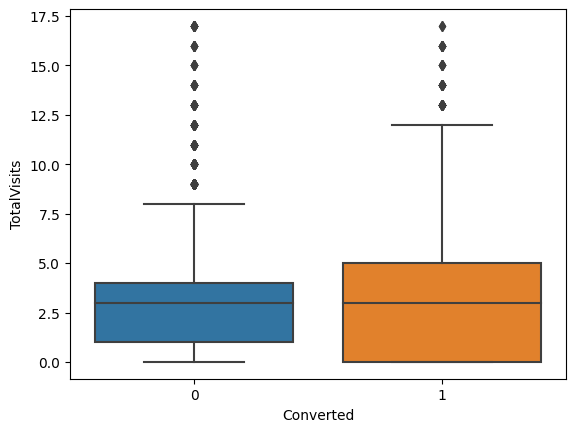

In [88]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()


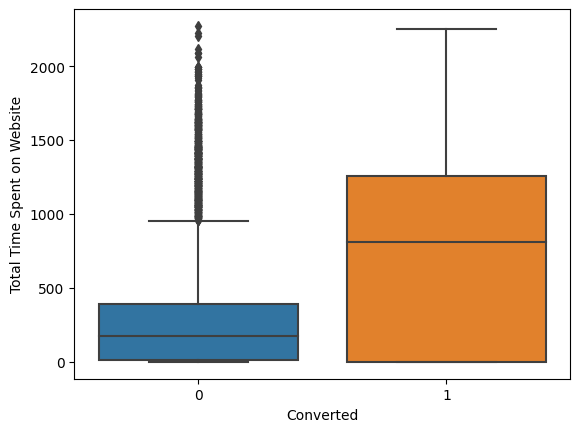

In [89]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=data.Converted, y=data['Total Time Spent on Website'])
plt.show()

Leads spending more time on the website are more likely to be converted.

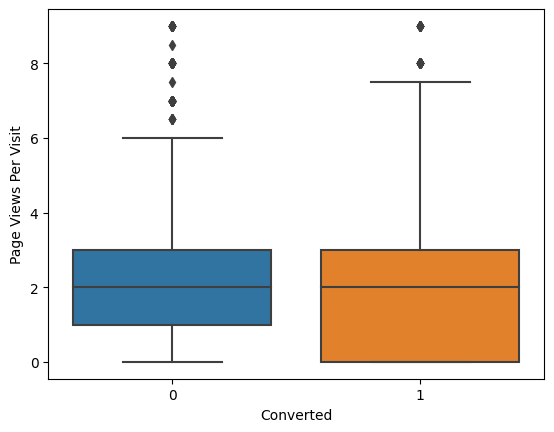

In [90]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])
plt.show()

 converted and unconverted leads is the same.

In [91]:
#checking missing values in leftover columns/

round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [92]:
#getting a list of categorical columns

cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [94]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [95]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [96]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [100]:
#dropping the original columns after dummy variable creation

data.drop(cat_cols,1,inplace = True)

In [101]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Train-Test Split & logistic Regression Model

In [102]:
from sklearn.model_selection import train_test_split
X=data.drop('Converted', axis=1)

# Putting response variable to y
y = data['Converted']

y.head()



0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   float64
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

Scaling Data

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nums = X_train.select_dtypes(include=['float64','int64']).columns
X_train[nums]= scaler.fit_transform(X_train[nums])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Model Bulding using Stats

In [114]:
import statsmodels.api as sm

In [115]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(log, step = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), step=15)

In [116]:
rfe.support_


array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('What is your current occupation_Housewife', False, 3),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 2),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 3),
 ('City_Thane & Outskirts', False, 3),
 ('City_Tier II Cities', False, 3),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_International Business', False, 3),
 ('Special

In [118]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       '

In [119]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Notable 

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.3
Date:                Sat, 20 May 2023   Deviance:                       2378.5
Time:                        18:21:18   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3377      0.131     -2.580      0.010      -0.594      -0.081
Total Time Spent on Website                              1.0924      0.062     17.517      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7507      0.154     -4.885      0.000      -1.052      -0.449
Lead Origin_Lead Add Form                                1.6320      1.012      1.612      0.107      -0.352       3.616
What is your current occupation_Working Professional     0.9837      0.416      2.363      0.018       0.168       1.800
Specialization_Banking, Investment And Insurance         0.4828      0.304      1.587      0.112      -0.113       1.079
Specialization_Travel and Tourism                       -0.8747      0.479     -1.824      0.068      -1.814       0.065
Lead Source_Direct Traffic                              -1.1110      0.224     -4.971      0.000      -1.549      -0.673
Lead Source_Google                                      -0.8096      0.179     -4.516      0.000      -1.161      -0.458
Lead Source_Organic Search                              -0.8800      0.216     -4.076      0.000      -1.303      -0.457
Lead Source_Reference                                   -1.0302      1.122     -0.918      0.359      -3.229       1.169
Lead Source_Referral Sites                              -1.2366      0.486     -2.542      0.011      -2.190      -0.283
Lead Source_Welingak Website                             3.3542      1.432      2.342      0.019       0.547       6.162
Last Activity_Converted to Lead                         -0.7695      0.385     -1.998      0.046      -1.524      -0.015
Last Activity_Email Bounced                             -1.2449      0.478     -2.604      0.009      -2.182      -0.308
Last Activity_Olark Chat Conversation                   -1.2412      0.315     -3.937      0.000      -1.859      -0.623
Last Activity_Page Visited on Website                   -0.7130      0.269     -2.654      0.008      -1.240      -0.186
Last Activity_SMS Sent                                   0.8429      0.261      3.226      0.001       0.331       1.355
Last Notable Activity_Email Link Clicked                -1.3680      0.478     -2.863      0.004      -2.305      -0.431
Last Notable Activity_Modified                          -0.8591      0.190     -4.531      0.000      -1.231      -0.487
Last Notable Activity_Olark Chat Conversation           -1.0372      0.576     -1.801      0.072      -2.166       0.092
Last Notable Activity_SMS Sent                           1.3145      0.289      4.542      0.000       0.747       1.882
Tags_Busy                                                0

In [128]:
col = col.drop('Lead Source_Referral Sites',1)

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.9
Date:                Sat, 20 May 2023   Deviance:                       2385.9
Time:                        18:22:01   Pearson chi2:                 7.75e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6125
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4290      0.127     -3.376      0.001      -0.678      -0.180
Total Time Spent on Website                              1.0730      0.062     17.365      0.000       0.952       1.194
Lead Origin_Landing Page Submission                     -0.7655      0.153     -5.002      0.000      -1.065      -0.466
Lead Origin_Lead Add Form                                1.6972      1.011      1.678      0.093      -0.285       3.679
What is your current occupation_Working Professional     1.0029      0.417      2.407      0.016       0.186       1.819
Specialization_Banking, Investment And Insurance         0.4794      0.304      1.575      0.115      -0.117       1.076
Specialization_Travel and Tourism                       -0.8741      0.475     -1.839      0.066      -1.806       0.058
Lead Source_Direct Traffic                              -0.9966      0.219     -4.554      0.000      -1.426      -0.568
Lead Source_Google                                      -0.7011      0.174     -4.019      0.000      -1.043      -0.359
Lead Source_Organic Search                              -0.7718      0.212     -3.645      0.000      -1.187      -0.357
Lead Source_Reference                                   -1.0205      1.121     -0.911      0.363      -3.217       1.176
Lead Source_Welingak Website                             3.3610      1.432      2.347      0.019       0.554       6.168
Last Activity_Converted to Lead                         -0.8026      0.384     -2.088      0.037      -1.556      -0.049
Last Activity_Email Bounced                             -1.2305      0.478     -2.574      0.010      -2.168      -0.293
Last Activity_Olark Chat Conversation                   -1.2077      0.316     -3.826      0.000      -1.826      -0.589
Last Activity_Page Visited on Website                   -0.7393      0.268     -2.761      0.006      -1.264      -0.215
Last Activity_SMS Sent                                   0.8500      0.261      3.256      0.001       0.338       1.362
Last Notable Activity_Email Link Clicked                -1.3866      0.488     -2.842      0.004      -2.343      -0.430
Last Notable Activity_Modified                          -0.8480      0.190     -4.474      0.000      -1.220      -0.476
Last Notable Activity_Olark Chat Conversation           -1.0260      0.575     -1.784      0.074      -2.153       0.101
Last Notable Activity_SMS Sent                           1.3164      0.289      4.555      0.000       0.750       1.883
Tags_Busy                                                0.7301      0.234      3.121      0.002       0.272       1.189
Tags_Closed by Horizzon                                  7

In [130]:
col = col.drop('Lead Source_Reference')

In [131]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.4
Date:                Sat, 20 May 2023   Deviance:                       2386.7
Time:                        18:22:42   Pearson chi2:                 7.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6124
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4284      0.127     -3.372      0.001      -0.677      -0.179
Total Time Spent on Website                              1.0727      0.062     17.366      0.000       0.952       1.194
Lead Origin_Landing Page Submission                     -0.7640      0.153     -4.995      0.000      -1.064      -0.464
Lead Origin_Lead Add Form                                0.8867      0.462      1.917      0.055      -0.020       1.793
What is your current occupation_Working Professional     0.9947      0.416      2.392      0.017       0.180       1.810
Specialization_Banking, Investment And Insurance         0.4762      0.305      1.564      0.118      -0.121       1.073
Specialization_Travel and Tourism                       -0.8727      0.475     -1.838      0.066      -1.803       0.058
Lead Source_Direct Traffic                              -0.9945      0.219     -4.547      0.000      -1.423      -0.566
Lead Source_Google                                      -0.6998      0.174     -4.015      0.000      -1.042      -0.358
Lead Source_Organic Search                              -0.7699      0.212     -3.638      0.000      -1.185      -0.355
Lead Source_Welingak Website                             4.1712      1.115      3.742      0.000       1.986       6.356
Last Activity_Converted to Lead                         -0.8049      0.384     -2.097      0.036      -1.557      -0.053
Last Activity_Email Bounced                             -1.2335      0.478     -2.582      0.010      -2.170      -0.297
Last Activity_Olark Chat Conversation                   -1.2108      0.315     -3.840      0.000      -1.829      -0.593
Last Activity_Page Visited on Website                   -0.7412      0.268     -2.769      0.006      -1.266      -0.217
Last Activity_SMS Sent                                   0.8420      0.261      3.227      0.001       0.331       1.353
Last Notable Activity_Email Link Clicked                -1.3892      0.489     -2.843      0.004      -2.347      -0.432
Last Notable Activity_Modified                          -0.8436      0.189     -4.453      0.000      -1.215      -0.472
Last Notable Activity_Olark Chat Conversation           -1.0227      0.575     -1.779      0.075      -2.149       0.104
Last Notable Activity_SMS Sent                           1.3237      0.289      4.581      0.000       0.757       1.890
Tags_Busy                                                0.7276      0.234      3.111      0.002       0.269       1.186
Tags_Closed by Horizzon                                  6.9749      1.022      6.828      0.000       4.973       8.977
Tags_Interested in other courses                        -2

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_SMS Sent,7.59
18,Last Notable Activity_SMS Sent,7.40
1,Lead Origin_Landing Page Submission,4.67
6,Lead Source_Direct Traffic,3.90
16,Last Notable Activity_Modified,3.60
7,Lead Source_Google,2.77
12,Last Activity_Olark Chat Conversation,2.21
25,Tags_Will revert after reading the email,2.07
2,Lead Origin_Lead Add Form,1.98
8,Lead Source_Organic Search,1.71


In [134]:
#dropping variable with high VIF

col = col.drop('Last Activity_SMS Sent',1)

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.5
Date:                Sat, 20 May 2023   Deviance:                       2397.0
Time:                        18:24:00   Pearson chi2:                 7.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6118
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4293      0.127     -3.388      0.001      -0.678      -0.181
Total Time Spent on Website                              1.0707      0.062     17.351      0.000       0.950       1.192
Lead Origin_Landing Page Submission                     -0.7544      0.153     -4.944      0.000      -1.053      -0.455
Lead Origin_Lead Add Form                                0.9275      0.457      2.029      0.042       0.031       1.824
What is your current occupation_Working Professional     1.0028      0.413      2.428      0.015       0.193       1.812
Specialization_Banking, Investment And Insurance         0.4812      0.303      1.590      0.112      -0.112       1.075
Specialization_Travel and Tourism                       -0.8598      0.477     -1.803      0.071      -1.794       0.075
Lead Source_Direct Traffic                              -0.9704      0.218     -4.453      0.000      -1.398      -0.543
Lead Source_Google                                      -0.6820      0.174     -3.928      0.000      -1.022      -0.342
Lead Source_Organic Search                              -0.7419      0.211     -3.517      0.000      -1.155      -0.328
Lead Source_Welingak Website                             4.1928      1.113      3.766      0.000       2.011       6.375
Last Activity_Converted to Lead                         -1.1460      0.365     -3.137      0.002      -1.862      -0.430
Last Activity_Email Bounced                             -1.4637      0.469     -3.119      0.002      -2.384      -0.544
Last Activity_Olark Chat Conversation                   -1.5422      0.293     -5.258      0.000      -2.117      -0.967
Last Activity_Page Visited on Website                   -0.8940      0.264     -3.389      0.001      -1.411      -0.377
Last Notable Activity_Email Link Clicked                -1.3861      0.486     -2.852      0.004      -2.339      -0.433
Last Notable Activity_Modified                          -0.5060      0.151     -3.348      0.001      -0.802      -0.210
Last Notable Activity_Olark Chat Conversation           -0.6895      0.562     -1.227      0.220      -1.791       0.412
Last Notable Activity_SMS Sent                           2.1464      0.138     15.527      0.000       1.875       2.417
Tags_Busy                                                0.7499      0.234      3.203      0.001       0.291       1.209
Tags_Closed by Horizzon                                  6.8284      1.019      6.701      0.000       4.831       8.826
Tags_Interested in other courses                        -2.4417      0.416     -5.869      0.000      -3.257      -1.626
Tags_Lost to EINS                                        5

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.67
6,Lead Source_Direct Traffic,3.89
7,Lead Source_Google,2.76
15,Last Notable Activity_Modified,2.66
24,Tags_Will revert after reading the email,2.07
2,Lead Origin_Lead Add Form,1.97
12,Last Activity_Olark Chat Conversation,1.94
8,Lead Source_Organic Search,1.70
17,Last Notable Activity_SMS Sent,1.67
22,Tags_Other_Tags,1.44


In [137]:
col = col.drop('Lead Origin_Landing Page Submission')

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.9
Date:                Sat, 20 May 2023   Deviance:                       2421.7
Time:                        18:24:53   Pearson chi2:                 7.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6103
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4434      0.126     -3.506      0.000      -0.691      -0.196
Total Time Spent on Website                              1.0653      0.061     17.346      0.000       0.945       1.186
Lead Origin_Lead Add Form                                1.0148      0.455      2.232      0.026       0.124       1.906
What is your current occupation_Working Professional     0.9575      0.406      2.360      0.018       0.162       1.753
Specialization_Banking, Investment And Insurance         0.3009      0.299      1.008      0.314      -0.284       0.886
Specialization_Travel and Tourism                       -1.0582      0.465     -2.275      0.023      -1.970      -0.147
Lead Source_Direct Traffic                              -1.6161      0.177     -9.128      0.000      -1.963      -1.269
Lead Source_Google                                      -1.0590      0.159     -6.678      0.000      -1.370      -0.748
Lead Source_Organic Search                              -1.0605      0.201     -5.275      0.000      -1.455      -0.666
Lead Source_Welingak Website                             4.1203      1.112      3.705      0.000       1.940       6.300
Last Activity_Converted to Lead                         -1.0471      0.363     -2.881      0.004      -1.760      -0.335
Last Activity_Email Bounced                             -1.5023      0.466     -3.227      0.001      -2.415      -0.590
Last Activity_Olark Chat Conversation                   -1.4335      0.289     -4.954      0.000      -2.001      -0.866
Last Activity_Page Visited on Website                   -0.8771      0.266     -3.303      0.001      -1.397      -0.357
Last Notable Activity_Email Link Clicked                -1.3383      0.482     -2.778      0.005      -2.283      -0.394
Last Notable Activity_Modified                          -0.5209      0.151     -3.453      0.001      -0.817      -0.225
Last Notable Activity_Olark Chat Conversation           -0.7255      0.561     -1.294      0.196      -1.825       0.374
Last Notable Activity_SMS Sent                           2.1236      0.137     15.510      0.000       1.855       2.392
Tags_Busy                                                0.6363      0.235      2.713      0.007       0.177       1.096
Tags_Closed by Horizzon                                  6.6844      1.018      6.566      0.000       4.689       8.680
Tags_Interested in other courses                        -2.3714      0.415     -5.715      0.000      -3.185      -1.558
Tags_Lost to EINS                                        5.6519      0.617      9.155      0.000       4.442       6.862
Tags_Other_Tags                                         -2

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,2.66
23,Tags_Will revert after reading the email,2.06
5,Lead Source_Direct Traffic,1.97
1,Lead Origin_Lead Add Form,1.96
6,Lead Source_Google,1.95
11,Last Activity_Olark Chat Conversation,1.92
16,Last Notable Activity_SMS Sent,1.67
21,Tags_Other_Tags,1.43
7,Lead Source_Organic Search,1.43
22,Tags_Ringing,1.39


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [140]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.287711
4696    0.030099
3274    0.484282
2164    0.002490
1667    0.986114
7024    0.202209
8018    0.028429
778     0.061885
6942    0.003522
4440    0.082192
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28771081, 0.03009867, 0.48428191, 0.00249001, 0.98611406,
       0.20220928, 0.02842909, 0.06188468, 0.00352209, 0.08219235])

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.287711,9196
1,0,0.030099,4696
2,0,0.484282,3274
3,0,0.002490,2164
4,1,0.986114,1667


In [143]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.287711,9196,0
1,0,0.030099,4696,0
2,0,0.484282,3274,0
3,0,0.002490,2164,0
4,1,0.986114,1667,1


In [144]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3713  169]
 [ 287 2098]]


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9272379128769747


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.879664570230608

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.9564657393096342

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04353426069036579


In [150]:
# positive predictive value 
print (TP / float(TP+FP))

0.925452139391266


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.92825


In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

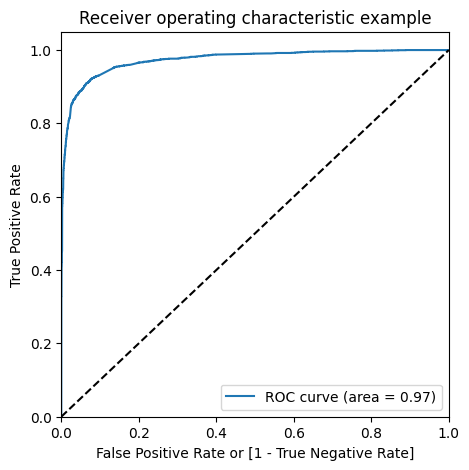

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [155]:
#ROC curve = 0.97 which is a good value

Finding optimal cutoff point

In [157]:
# Let's create columns with different probability cutoffs 
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.287711,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.030099,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.484282,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.002490,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.986114,1667,1,1,1,1,1,1,1,1,1,1,1


In [159]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.841711  0.971488  0.761978
0.2   0.2  0.898516  0.950524  0.866564
0.3   0.3  0.922291  0.916562  0.925811
0.4   0.4  0.925483  0.896855  0.943071
0.5   0.5  0.927238  0.879665  0.956466
0.6   0.6  0.928514  0.861635  0.969603
0.7   0.7  0.915590  0.810901  0.979907
0.8   0.8  0.907292  0.781551  0.984544
0.9   0.9  0.888463  0.722851  0.990211


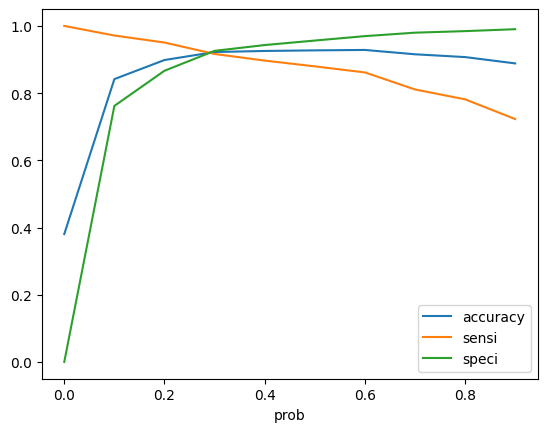

In [160]:
#accuracy sensitivity and specificity 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.287711,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.030099,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.484282,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.002490,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.986114,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.287711,9196,0,29
1,0,0.030099,4696,0,3
2,0,0.484282,3274,1,48
3,0,0.002490,2164,0,0
4,1,0.986114,1667,1,99


In [163]:
#accuracy overall
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9222913674804532

In [168]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion_2

array([[3594,  288],
       [ 199, 2186]], dtype=int64)

In [170]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [171]:
TP/float(TP+FN) #sensitivity

0.9165618448637316

In [172]:
TN/float(TN+FP)#specificity

0.9258114374034003

In [173]:
FP/float(TN+FP) # false positive Rate

0.07418856259659969

In [174]:
TP/float(TP+FP) #positive

0.883589329021827

In [175]:
TN/float(TN+FN) #Negative 

0.9475349327708937

Observation

In [176]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3594,  288],
       [ 199, 2186]], dtype=int64)

In [178]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])  #precision

0.883589329021827

In [179]:

TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1]) #recall

0.9165618448637316

In [180]:
from sklearn.metrics import precision_score, recall_score

In [181]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.883589329021827

In [182]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9165618448637316

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

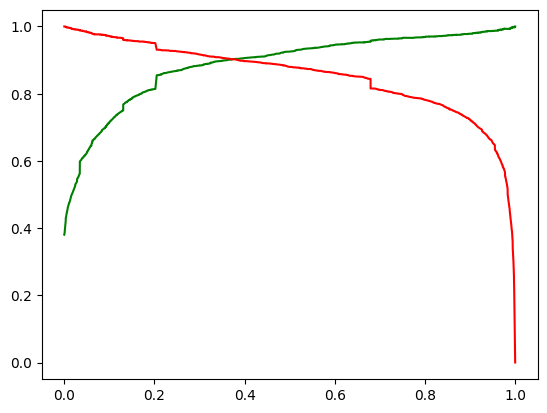

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [187]:
#scaling test set

num=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [188]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
984,-0.550262,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
8135,0.812462,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
X_test_sm = sm.add_constant(X_test)

PREDICTIONS ON TEST SET

In [190]:
y_test_pred = res.predict(X_test_sm)

In [191]:
y_test_pred

7681    0.022664
984     0.007180
8135    0.716997
6915    0.003441
2712    0.922250
          ...   
9029    0.033963
1420    0.021415
5996    0.977519
4143    0.001968
1005    0.242634
Length: 2686, dtype: float64

In [192]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [193]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [194]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [195]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [198]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.022664
1,0,984,0.007180
2,0,8135,0.716997
3,0,6915,0.003441
4,1,2712,0.922250


In [199]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [200]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [201]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9262844378257632

In [202]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1569,  107],
       [  91,  919]], dtype=int64)

In [203]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [204]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9099009900990099

In [205]:
# Let us calculate specificity
TN / float(TN+FP)

0.9361575178997613

In [206]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8957115009746589

In [207]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9099009900990099